In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 2.
**Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.**

In [ ]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 3.
**Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.**

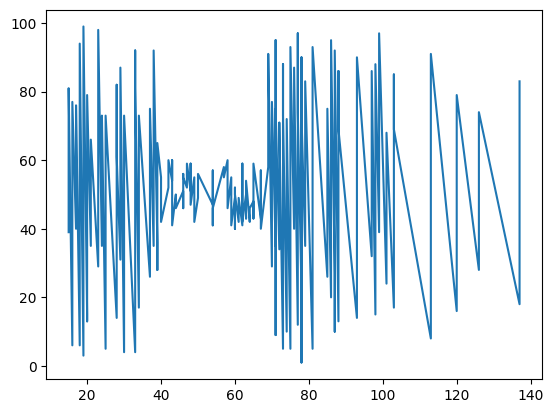

In [ ]:
plt.plot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

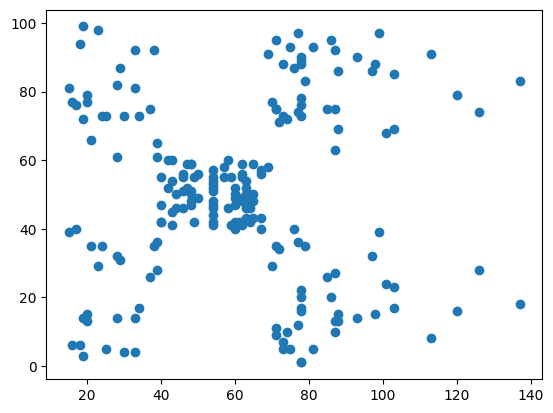

In [ ]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

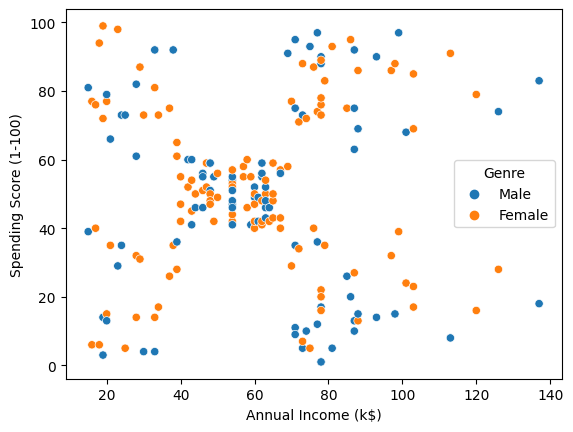

In [ ]:
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)',data=df , hue='Genre')

# 4.
**Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.**

Ответ: 5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

([<matplotlib.axis.XTick at 0x7fdf68ddf760>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

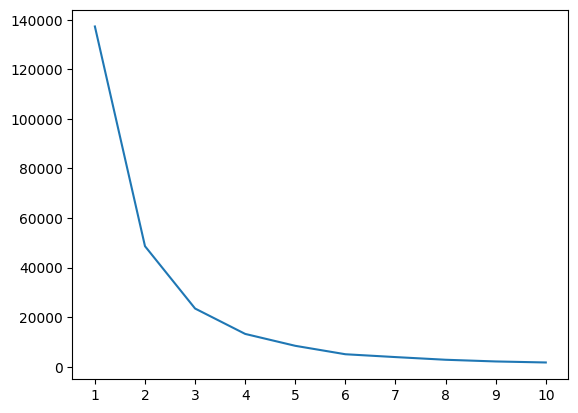

In [ ]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(df[['Annual Income (k$)']])
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

# 5.
**Обучить модель К-средних и предсказать кластер для каждого значения из датасета.**

In [ ]:
k_means = KMeans(n_clusters=5,random_state=42)
k_means.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

# 6.
**Построить графическую интерпретацию из пункта 3, с центрами кластеров.**

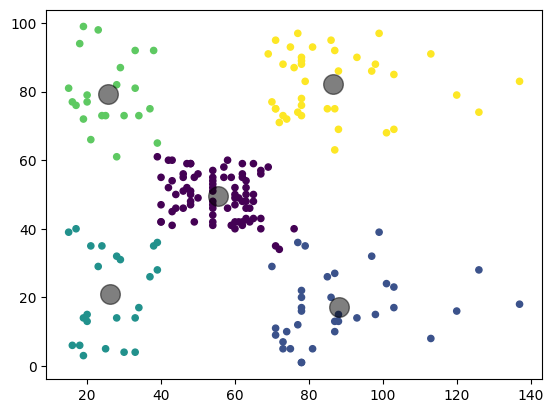

In [ ]:
y_kmeans = k_means.predict(df[['Annual Income (k$)','Spending Score (1-100)']])
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# 7.
**Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.**

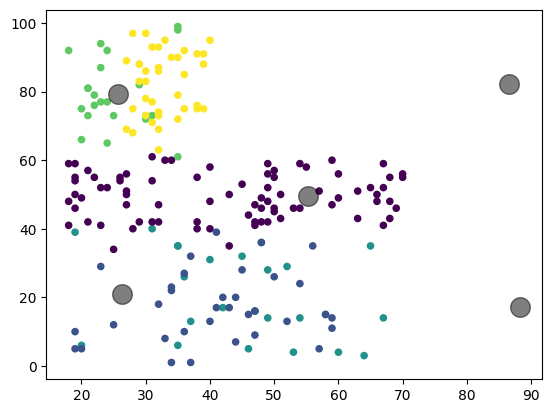

In [ ]:
#y_kmeans = k_means.predict(df[['Annual Income (k$)','Spending Score (1-100)']])
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);